# Графы и анализ социальных сетей

## Минутка истории: Семь мостов Кёнигсберга

Графовый подход к не-графовым задачам в какой-то степени начался с задачи про семь мостов. Звучит она так:

> Как пройти по всем городским мостам Кёнигсберга (через реку Преголя), не проходя ни по одному из них дважды?

Окончательно вопрос закрыл математик Леонид Эйлер, который составил математическую модель, где вершинами графа была земля, а рёбрами — мосты:

<img src="./bridges_graph.png" width="600px">

Так как все вершины нечётные (их них исходит нечётное количество рёбер, три или пять), пройти по всем мостам без повторов нельзя.

## Варианты практического применения

### Анализ сообществ при помощи графов

В XX веке графы начали использовать для анализа сообществ. Популярный пример — сообщество каратэ-клуба, за которым наблюдал исследователь Уэйн Захари в 1970–1972 гг. В клубе было 34 человека, включая администратора и тренера; каждая вершина (=человек) соединена с другой, если эти люди взаимодействовали вне занятий по каратэ.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Social_Network_Model_of_Relationships_in_the_Karate_Club.png" width="400px">

Затем клуб распался из-за конфликта администратора и тренера, и благодаря связям в исходной сети исследователи смогли угадать, кто останется с тренером, а кто уйдёт в другой клуб или бросит занятия:

<img src="https://www.researchgate.net/profile/Thiago_Silva8/publication/224946853/figure/fig2/AS:302557231632393@1449146673764/Illustration-of-the-Zacharys-karate-club-network-There-are-34-vertices-divided-into-two.png" width="600px">


### Цифровое литературоведение

В digital humanities сетевой анализ обрёл новую жизнь. Теперь каждая вершина — это персонаж, а ребро — факт общения персонажей между собой или их присутствие на сцене в один момент времени. Так, например, выглядит сеть трагедии «Отелло»:

<img src="./othello.png" width="600px">


## Теория: направленность, вес

**Направленностью** называют такой критерий, когда нам важно, откуда ребро выходит и куда оно приходит. На визуализациях такое помечают стрелкой. На картинке ниже направленный граф — (b).

<img src="https://www.researchgate.net/profile/Valeria_Fionda/publication/50591619/figure/fig3/AS:667872535773189@1536244629217/a-An-example-of-undirected-graph-and-b-an-example-of-directed-graph.png" width="400px">

Рёбра графа бывают **взвешенными** — это значит, что каждому ребру приписано условное число, отвечающее, например, за силу связи, расстояние между вершинами и т.п. На картинке ниже — граф станций и расстояний между ними. Расстояния указаны как вес рёбер.

<img src="https://2.bp.blogspot.com/-SXFrnohTRdA/WFftnGUHPrI/AAAAAAAACGY/bFXdTA8qJ2cLp8v4cfx9QX2zqqqkxkgAACLcB/s320/WeightedGraph.jpg">

Иногда (нечасто) вес бывает и у вершин.

# Данные

Данные - собранная с помощью VK API информация о подписчиках сообщества Центра Digital Humanities ВШЭ.
Скачан список подписчиков и базовая информация о них (часть имени специально скрыта), а также собрана о том, какие из подписчиков являются друзьями (в соцсети), если профиль открыт.

В базе есть 4 таблицы

**users**

- id = vk id пользователя
- first_name = имя
- last_name = фамилия (оставлены первые буквы)
- gender = 1 - женщины, 2 - мужчины
- byear = год рождения
- bmonth = месяц рождения
- bday = день рождения
- city = id города (см. таблицу cities)
- country = id страны (см. таблицу countries)
- home_town = текстовое название родного города
- verified = метка о верифицированном аккаунте
- is_closed = 1 - закрытый аккаунт, 0 - открытый

**friends**

id1, id2 = идентификаторы пользователей (должны быть обе пары, например (1, 2) и (2, 1), так как друзья обычно взаимные)

**countries**, **cities**

id = идентификатор
name = название

## Работа с графами в питоне

Для работы с графами в питоне есть специальная библиотека ```networkx```, которая имеет нужные структуры данных, а также метрики и инструменты для анализа графов.

Хорошо читать документацию, чтобы разобраться в доступных алгоритмах, параметрах функций и прочем.

[Документация](https://networkx.org/documentation/latest/reference/index.html)

In [1]:
import networkx as nx
import sqlite3

In [2]:
db = sqlite3.connect("vk_db2.db")
cur = db.cursor()

**Создаем новый граф**

Есть несколько видов графов:
    
- ```Graph``` - обычный граф, две вершины могут быть соединены 1 ребром, это ребро обозначает обоюдную связь (например, взаимные друзья в соцсети)
- ```DiGraph``` - направленный граф, связи имеют направление (родитель -> ребенок, подписки в инстаграме, которые могут быть невзаимными)
- ```MultiGraph``` - граф, где две вершины могут быть соединены разными параллельными ребрами (обоюдными)
- ```MultiDiGraph``` - направленный граф с возможностью нескольких параллельных ребер

In [3]:
G = nx.Graph()

Заберем из базы необходимую информацию (id, какое-то читаемое имя)

In [4]:
cur.execute("SELECT id, first_name || last_name, city FROM users WHERE is_closed = 0")
users = cur.fetchall()

Добавим вершины, можно много сразу (списком), можно по одному. На первом месте уникальный идентификатор вершины, далее - различные атрибуты. которые можно дополнительно присвоить (у нас - это имя)

In [5]:
for idx, name, city in users:
    G.add_node(idx, name=name, city=city)

Забираем из базы информацию о связях, на всякий случай сохраняем только уникальные пары, добиваемся этого с помощью сортировки айди по возрастанию внтури пары.

In [6]:
cur.execute("SELECT id1, id2 FROM friends")
friends = set([tuple(sorted(i)) for i in cur.fetchall()])
len(friends)

2173

Добавляем список связей

In [7]:
G.add_edges_from(friends)

## Метрики графа

[Можно почитать на русском тут](https://letopisi.org/index.php/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%81%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9)

Можно использовать математические расчеты для того, чтобы найти какие-то явления или описать граф содержательно.

**Степень вершины**

Количество связей с другими вершинами. Например, если у вершины много связей, это может быть какой-то очень активный, общительный человек, у кого много друзей.

**Центральность вершины**

Это наиболее активные узлы сети. Такой показатель можно измерять по разным критериям

- Центральность по степени похожа на просто степень вершины, наиболее центральным, важным в локальном множестве вершин будет та, у которой много связей с соседями.

- Центральность по близости (closeness centrality) - насколько доступны для вершины другие узлы. Это означает, что вершина довольно хорошо связана с другими, даже если это не ближайшие соседи, связянные непосредственной связью. Но через пару шагов можно добраться до другого узла. Если это люди, то такому человеку легко доступна информация, он быстро может кого-то найти через друзей

- Центральность по посредничеству (betweenness centrality) - это важный показатель, который ознован на доле кратчайших путей между разными парами вершин, которые проходят через эту точку. То есть эта точка является важным проводником между группами вершин или в целом вершинами. Например, есть две враждующие группы и есть какой-то посредник, через которого можно передать информацию. Такой персонаж очень важен.

**Плотность**

Насколько граф плотный относительно максимально возможного числа связей. Плотный граф - это полносвязный граф, где все связаны со всеми или близкий к этому.

**Коэффициент кластеризации**

Степень связности среди соседей, вероятность, что два соседа вершины тоже связаны прямым соединением.



## Как это применяется?

Есть много исследований в Digital Humanities, которые изучают то, как связаны персонажи в произведении, как это меняется в разных эпохах и как можно по-другому взглянуть на персонажей или выделить тех, кто занимает значимую роль, когда это не очень заметно читателю.


[Стоит почитать, например, эту презентацию](https://dlina.github.io/presentations/2016-yasnaya-polyana/#/)

## Анализ ВК-сообщества 

**Посмотрим на граф в целом**

Давайте нарисуем граф в целом. Когда он очень большой, это довольно бесполезное занятие.

Давайте возьмем кусочек и нарисуем только его. Возьмем случайный набор из вершин, которые с кем-то соединены.

In [8]:
import matplotlib.pyplot as plt

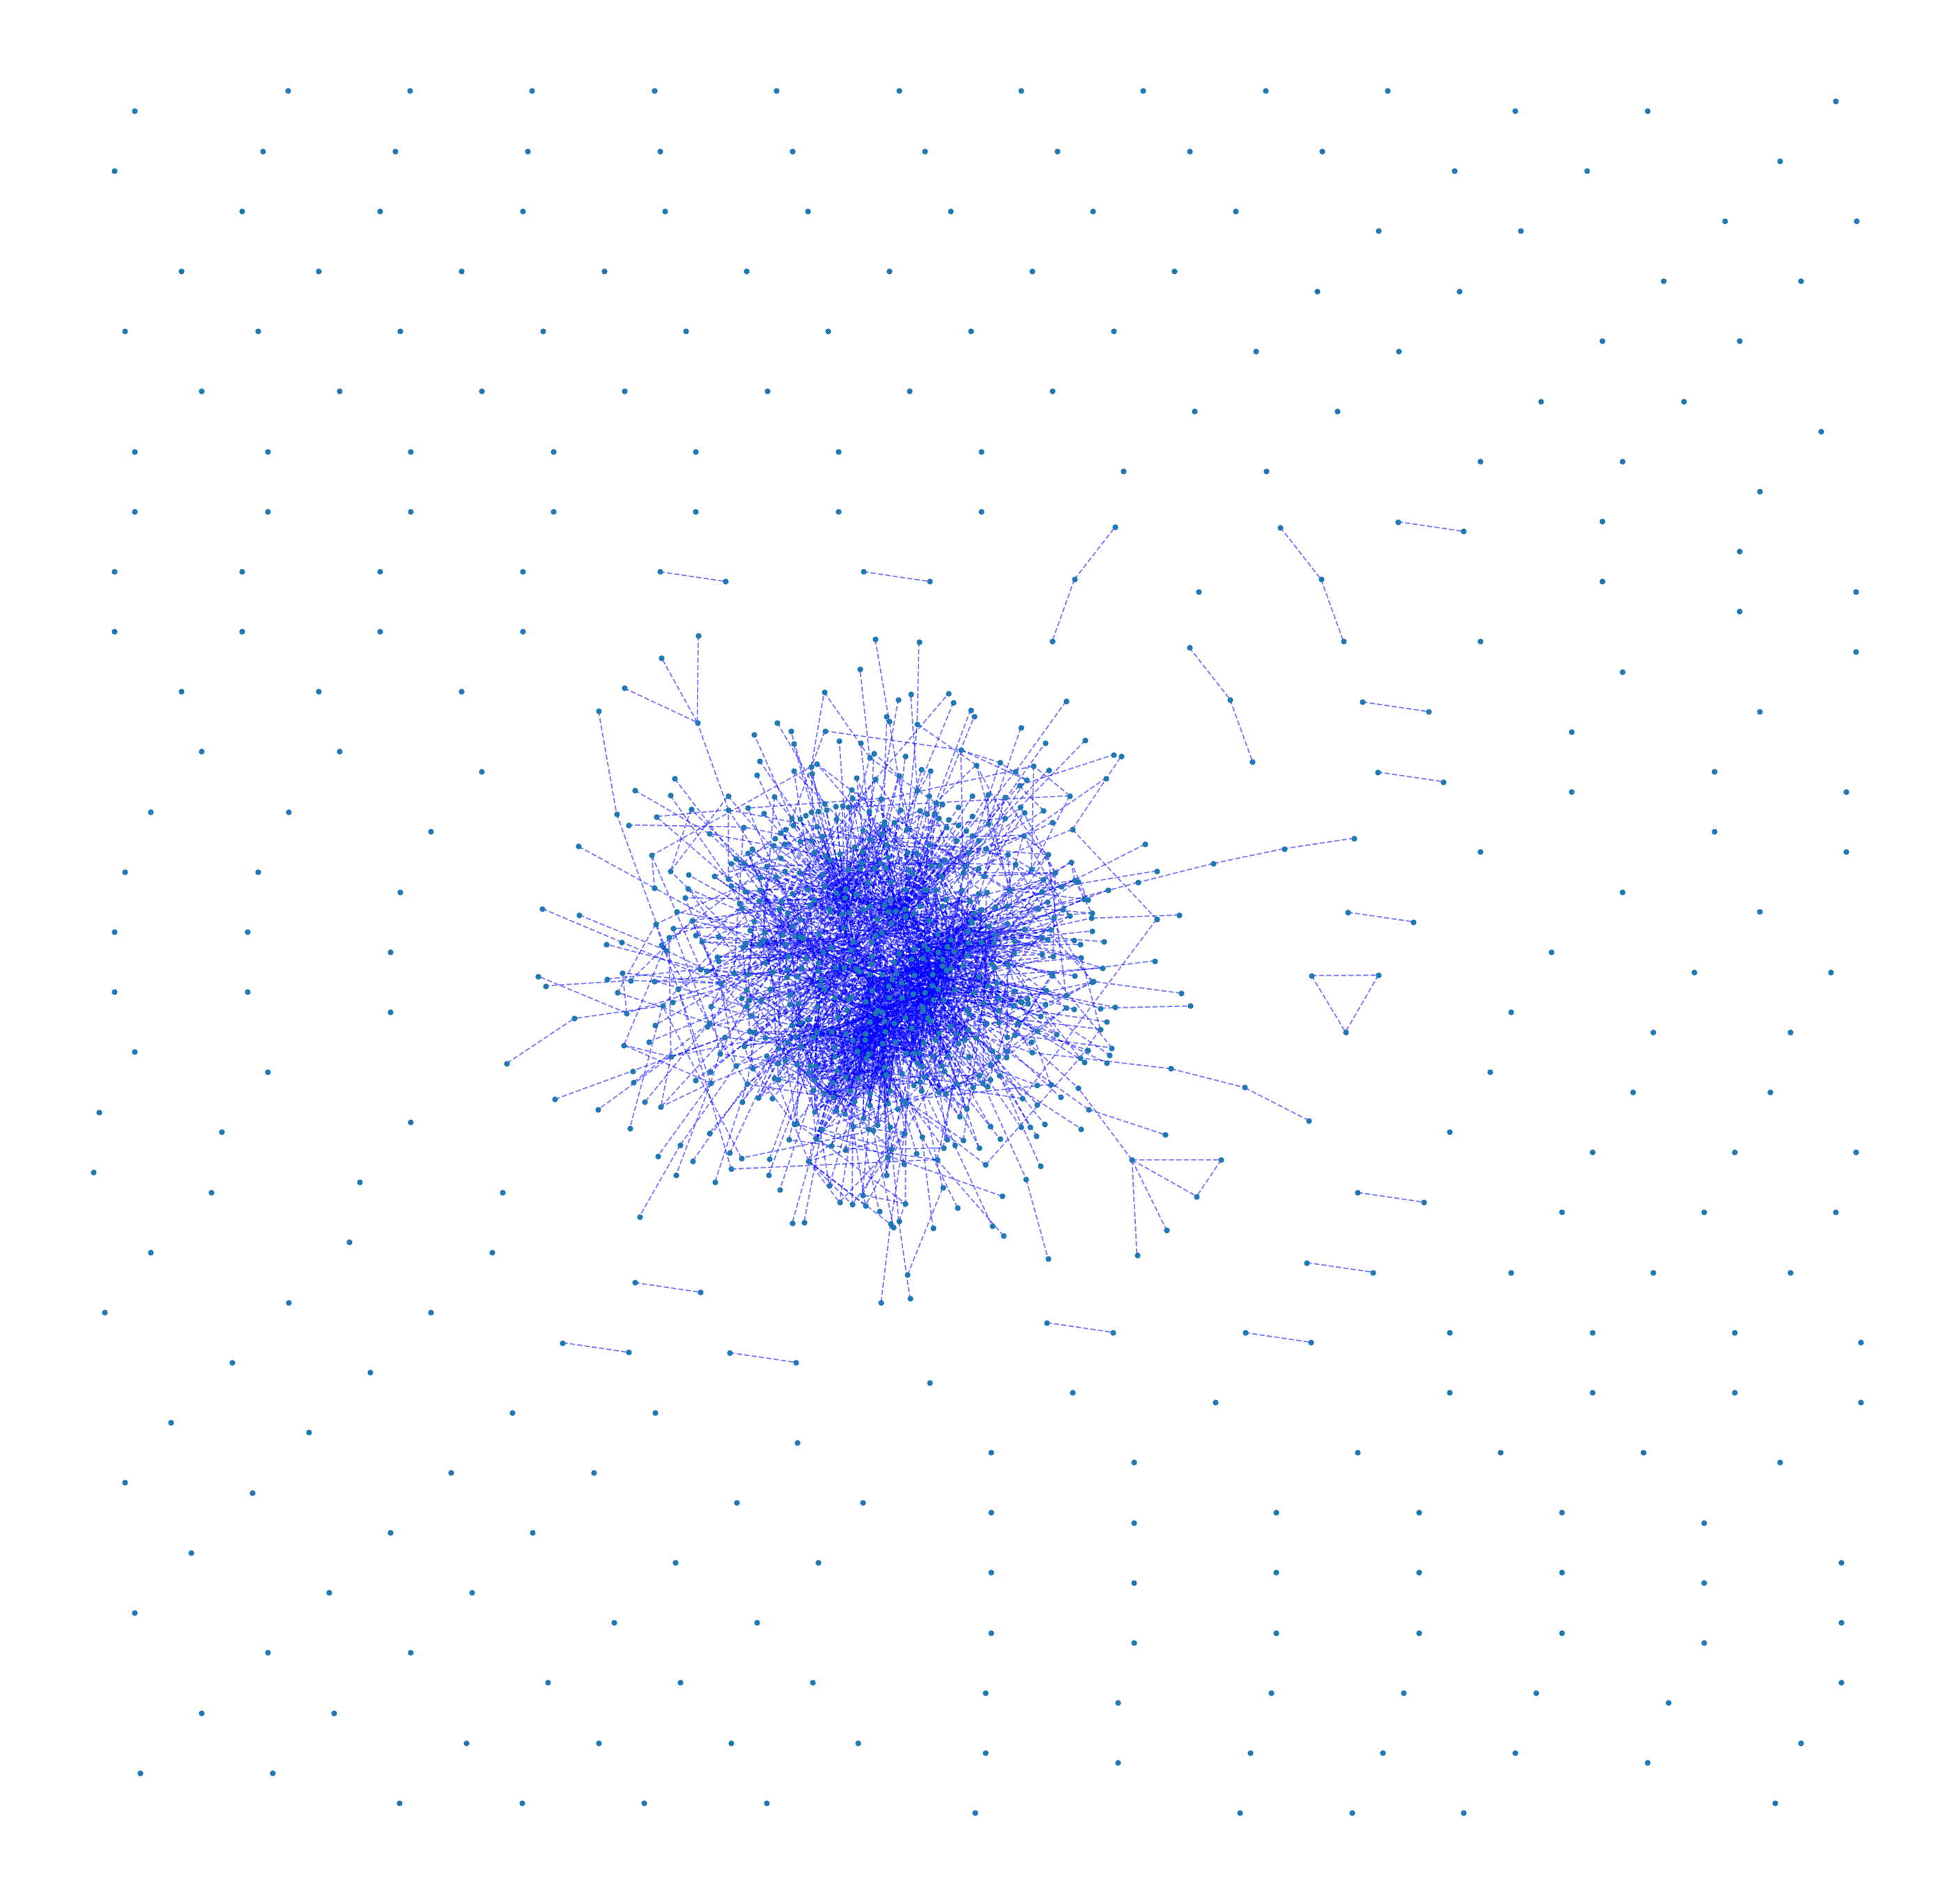

In [9]:
# у графов много разных раскладок, выбирайте по своему вкусу

# pos = nx.spring_layout(G) # если будут проблемы с graphviz, возьмите эту строчку
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="neato")

plt.figure(figsize=(50, 50))

# рисуем вершины 
nx.draw_networkx_nodes(G, pos, node_size=50)
# рисуем свзяи
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.5, edge_color='b', style='dashed')
# подписи
# nx.draw_networkx_labels(G, pos, labels={i: G.nodes()[i].get("name") for i in G.nodes()}, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

Мы видим различные группы вершин

## Применение метрик на практике

**Степень вершины**

Пользователи. у которых наибольшее количество друзей внутри сообщества.

In [10]:
degrees = dict(nx.degree(G))

In [11]:
sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

[(1895348, 77),
 (1887357, 73),
 (4767325, 55),
 (92283380, 51),
 (640287, 48),
 (1420000, 44),
 (227103266, 44),
 (7862914, 40),
 (82182222, 40),
 (71079139, 39)]

### Связные компоненты

Связные компоненты - это кусочки графа, где вершины связаны между собой (хотя бы через длинный путь через другие)

In [12]:
from collections import Counter

In [13]:
components = nx.components.connected_components(G)

component_lengths = Counter([len(i) for i in components])

component_lengths.most_common(50)

[(1, 269), (2, 13), (3, 4), (687, 1)]

В основном все компоненты - это отдельные люди, которые подписаны на сообщество, но не являются друзьями с кем-то из других подписчков.

Есть пары, где двое друзей или трое подписаны на сообщество.

Но есть **гигантская компента** людей, которые как-то между собой связаны (>600 человек) - это основное сообщество, можно это выделить в отдельный объект и поизучать.

Вот так можно достать только ее

In [14]:
components = nx.components.connected_components(G)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

687

In [15]:
B = G.subgraph(nodes)

### Центральности

**Центральность по степени вершины**

In [16]:
# Центральность по степени вершины дает тот же результат, что и просто степень вершины

degree_centrality = dict(nx.degree_centrality(G))
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[(1895348, 0.07754279959718026),
 (1887357, 0.07351460221550855),
 (4767325, 0.0553877139979859),
 (92283380, 0.0513595166163142),
 (640287, 0.04833836858006042),
 (1420000, 0.04431017119838872),
 (227103266, 0.04431017119838872),
 (7862914, 0.04028197381671702),
 (82182222, 0.04028197381671702),
 (71079139, 0.03927492447129909)]

**Центральность по близости**

Будет долго считаться, если у нас очень большой граф, нужно проверить все пары вершин и кратчайшие пути между ними.

In [17]:
closeness_centrality = dict(nx.closeness_centrality(G))
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[(1895348, 0.2715836067371313),
 (1887357, 0.263724760020197),
 (1687066, 0.26039197459137037),
 (4767325, 0.25770168230358564),
 (640287, 0.2557546647362623),
 (151646553, 0.24864291382806614),
 (1420000, 0.24631673272156654),
 (9018235, 0.2459332609010348),
 (7862914, 0.24580570215575417),
 (72218459, 0.24580570215575417)]

In [18]:
from tqdm.auto import tqdm

In [19]:
# Можно попробовать посчитать для части вершин (у нас - с наибольшим числом связей).

# closeness_centrality = {
#     i: nx.closeness_centrality(B, u=i)
#     for i in tqdm(sorted(degrees, key=degrees.get, reverse=True)[:100])
# }

In [20]:
# sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]

Список отличается от центральности по степени вершины

**Центральность по посредничеству (betweenness centrality)**

In [21]:
betweenness_centrality = dict(nx.betweenness_centrality(G))
sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[(1887357, 0.0805928588216873),
 (1895348, 0.06475540793841537),
 (4767325, 0.04786101938267341),
 (1420000, 0.033057331023253096),
 (71079139, 0.03025212627026818),
 (640287, 0.025247912686708753),
 (118572183, 0.0244725182120261),
 (1687066, 0.02255867022732571),
 (7862914, 0.021421600311328757),
 (37244652, 0.02062652809162387)]

Можно считать на полном графе, на нашем большом мы не дождемся этого, поэтому можно указать, насколько большую выборку вершин брать для оценки параметра (k), чем меньше, тем менее точная информация.

In [22]:
# betweenness_centrality = nx.algorithms.centrality.betweenness_centrality(B, k=50)

In [23]:
# sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

### Плотность

Граф не очень плотный, не все знают всех в такой большой сети. Но граф большой компоненты более плотный, чем полный граф сообщества G, где есть много отдельных вершин.

In [24]:
nx.density(B), nx.density(G)

(0.009128292614612907, 0.0044030547838896416)

### Коэффициент кластеризации

In [25]:
# cluster_coef = nx.clustering(G)

cluster_coef = nx.clustering(G, nodes=sorted(degrees, key=degrees.get, reverse=True)[:100])

In [26]:
sorted(cluster_coef.items(), key=lambda x: x[1], reverse=True)[:10]

[(70972505, 0.6181818181818182),
 (112681416, 0.5757575757575758),
 (83786385, 0.47435897435897434),
 (44496545, 0.4727272727272727),
 (64971391, 0.4727272727272727),
 (414431864, 0.46153846153846156),
 (314127294, 0.40441176470588236),
 (110382461, 0.4),
 (378500609, 0.38461538461538464),
 (30568009, 0.38181818181818183)]

Например, у первого пользователя вероятность, что два друга будут друзьями 21%

## Порисовать еще

Давайте возьмем часть данных

In [27]:
components = nx.components.connected_components(G)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

687

In [28]:
B = G.subgraph(nodes)
len(B.nodes)

687

In [29]:
betweenness_centrality = nx.algorithms.centrality.betweenness_centrality(B)

# сделаем отсечку, чтобы подписывать только людей с максимальным значением
threshold = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:max(int(0.05 * len(betweenness_centrality)), 1)][-1][1]

In [30]:
threshold

0.01758386688721466

In [31]:
city_colors = {
    1: "red", # Moscow
    2: "blue", # Saint Petersburg
    110: "green", # Perm
    49: "pink", # Yekaterinburg
    95: "lightblue", # Nizhny Novgorod
    60: "black", # Kazan
    73: "brown", # Krasnoyarsk
    61: "yellow", # Kaliningrad
    56: "orange", # Izhevsk
}

В оффлайн юпитер-ноутбуке можно увеличить изображение

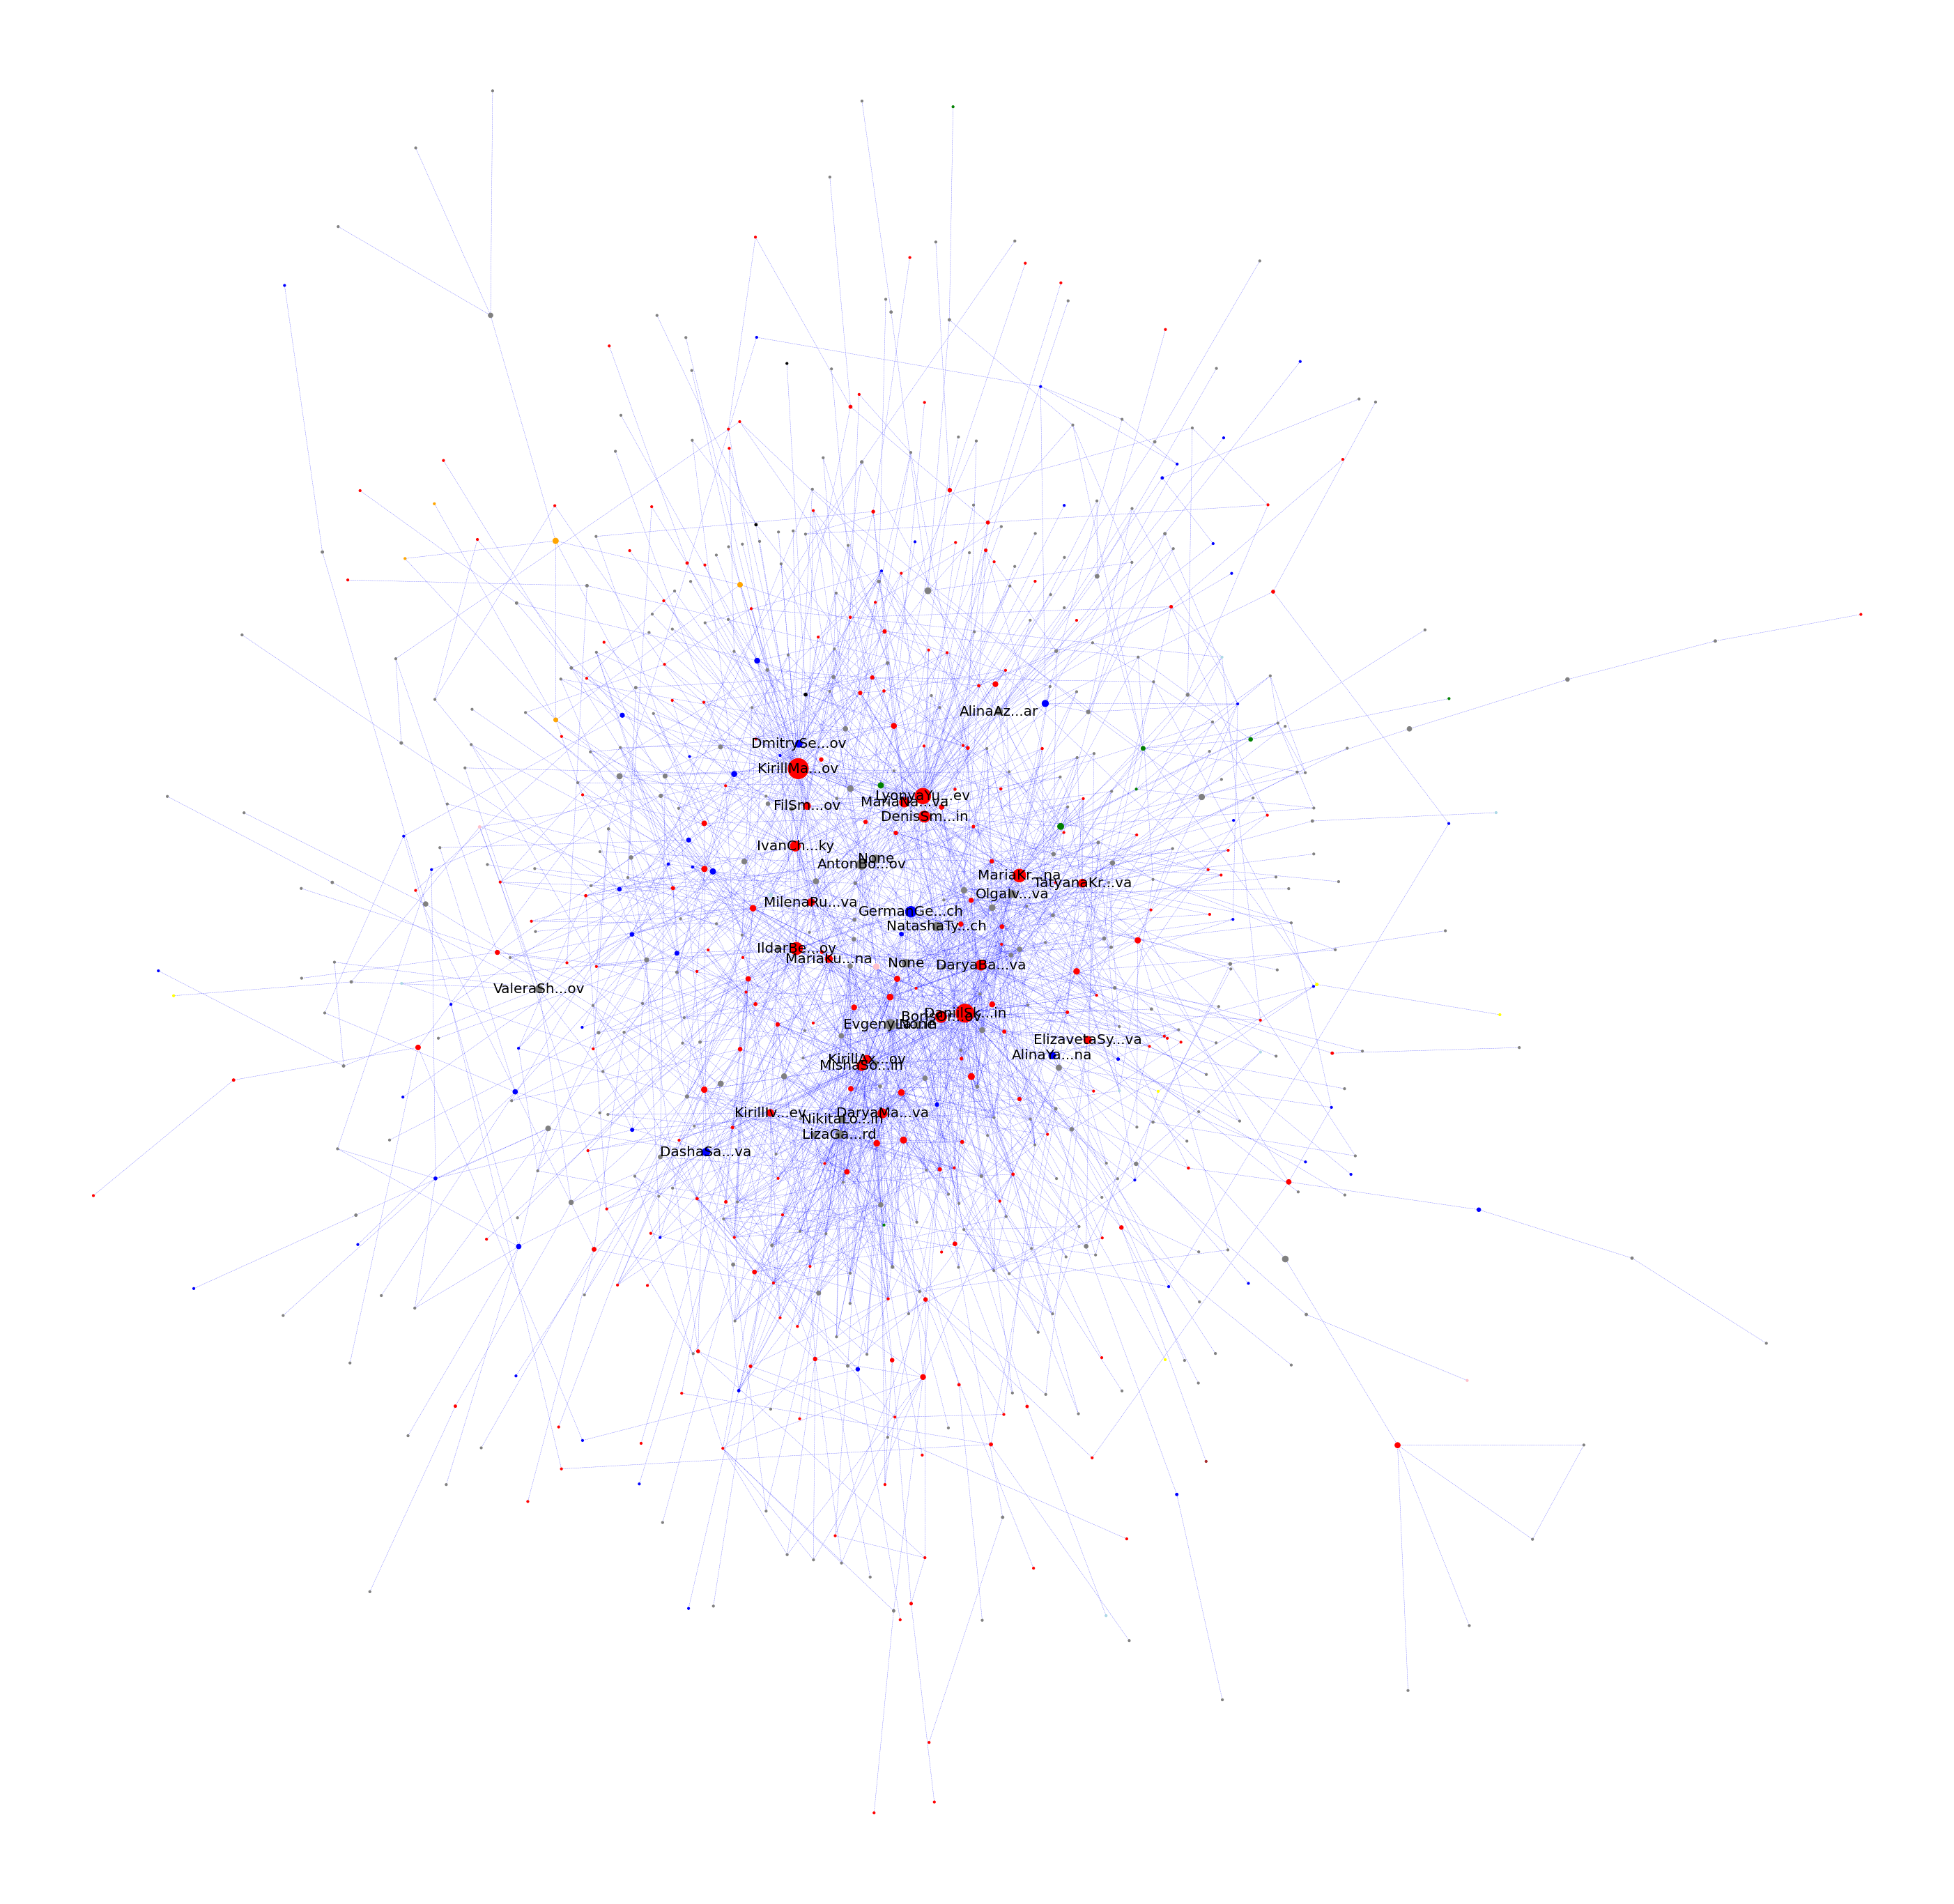

In [33]:
pos = nx.drawing.nx_agraph.graphviz_layout(B, prog="neato")
plt.figure(figsize=(50, 50))

nx.draw_networkx_nodes(
    B, pos, 
    node_size=[max(10, 5000 * betweenness_centrality[i]) for i in B.nodes], 
    node_color=[city_colors.get(B.nodes()[i].get("city"), "grey") for i in B.nodes()])

nx.draw_networkx_edges(B, pos, edgelist=B.edges(), width=0.5, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(B, pos, labels={i: B.nodes()[i].get("name") for i in B.nodes() if betweenness_centrality[i] >= threshold}, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()